<a href="https://colab.research.google.com/github/JudithPadron/Inteligencia-Artificial-JC/blob/main/PerceptronIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptrón
implementación del algoritmo donde aprende dos clases (Setosa, Versicolor).

## Librerias


*   **NumPy** para operaciones con matrices y álgebra lineal.
*   **Pandas** para manipulación de datos. (Para este casi se usa para cargar y procesar el conjunto de datos Iris).
*   **Matplotlib** visualización de datos.

El constructor Perceptron(object) inicializa el perceptrón con tres parámetros:

*   **eta:** tasa de aprendizaje, que controla cuándo se ajustan los pesos en cada paso.
*   **n_iter:** número de iteraciones o épocas.
*   **random_state:** garantiza reproducibilidad, inicializa los pesos de manera aleatoria.

**Método FIT:** ajusta los datos de entrenamiento. La variable X es la matriz de características con y son sus etiquetas correspondientes.

**self.w_** se inicializa los pesos aleatoriamente. En el vector w_ se incluye un peso adicional para el sesgo en la posición w_[0].

**update, self.w_[1:], self.w_[0]** evalua si la predicción no coincide con un valor real, se ajusta los pesos de forma proporcional entre la predicción y el valor del objeto [xi] multiplicado por la taza de aprendizaje, y los errores se almacenan en la lista errors_ para cada epoca.

**MÉTODOS AUXILIARES**
*   **net_input:** Calcula la suma ponderada de las entradas y los pesos.
*   **predict:** Devuelve la predicción de la clase (-1 o 1) aplicando la función de activación.

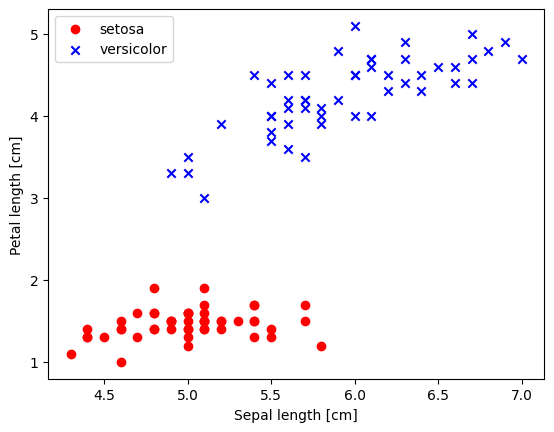

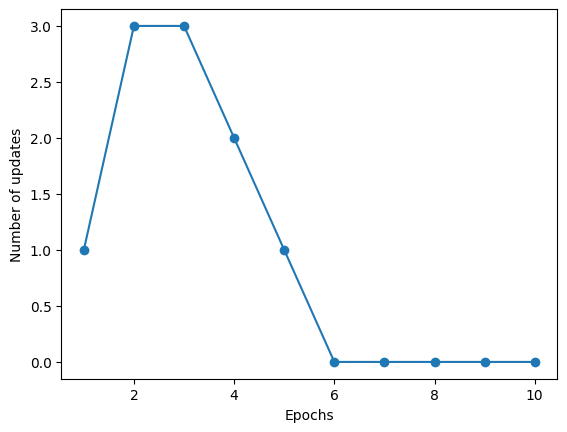

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron(object):

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state


    def fit(self, X, y):

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []


        for _ in range(self.n_iter):
            errors = 0

            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# ### Calcula el ángulo en radianes entre dos vectores v1 y v2 usando el coseno del ángulo.
# ### df.carga el conjunto de datos Iris que contiene 150 ejemplos de tres especies de iris:
# ### (setosa, versicolor, virginica), para este ejemplo solo se toman 100(50 setosa y 50 versicolor).
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

# ## Entrenar un modelo de perceptrón en el conjunto de datos Iris
# ### Leer el conjunto de datos Iris
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Supongo que df ya está definido. Si no, asegúrate de cargar tu DataFrame antes de este código.
# seleccionar setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extraer longitud de sépalo y longitud de pétalo
X = df.iloc[0:100, [0, 2]].values

# representar los datos en forma de gráfico
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# ### Entrenar el modelo de perceptrón
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
